<a href="https://colab.research.google.com/github/MuhtasimMahadi/Muhtasim_Hossain/blob/main/Crop_leaf_disease_detection_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
### GPU configuration

! nvidia-smi

Fri Dec 29 12:54:57 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
import keras
from keras.applications.mobilenet import MobileNet

from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Activation
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [5]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
train = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/titl_defence/datatset/slpit dataset/train',
    target_size = (224, 224),
    batch_size = 128,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/titl_defence/datatset/slpit dataset/val',
    target_size = (224, 224),
    batch_size = 128,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/titl_defence/datatset/slpit dataset/test',
    target_size = (224, 224),
    batch_size = 128,
    shuffle = False,
    class_mode = 'categorical'
)

Found 2590 images belonging to 3 classes.
Found 370 images belonging to 3 classes.
Found 740 images belonging to 3 classes.


In [31]:
VGG16 = tf.keras.applications.VGG16(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

In [32]:
VGG16.trainable = False

In [33]:
model = tf.keras.models.Sequential([
  VGG16,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [34]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_2 (Dropout)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 40932163 (156.14 MB)
Trainable params: 2

In [35]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 25
)

Epoch 1/25
21/21 [==============================] - 115s 5s/step - loss: 4.0274 - accuracy: 0.4336 - val_loss: 0.7489 - val_accuracy: 0.6081
Epoch 2/25
21/21 [==============================] - 59s 3s/step - loss: 0.6200 - accuracy: 0.7313 - val_loss: 0.4119 - val_accuracy: 0.8216
Epoch 3/25
21/21 [==============================] - 58s 3s/step - loss: 0.3812 - accuracy: 0.8506 - val_loss: 0.2496 - val_accuracy: 0.9027
Epoch 4/25
21/21 [==============================] - 58s 3s/step - loss: 0.3334 - accuracy: 0.8618 - val_loss: 0.2054 - val_accuracy: 0.9216
Epoch 5/25
21/21 [==============================] - 59s 3s/step - loss: 0.3109 - accuracy: 0.8710 - val_loss: 0.2056 - val_accuracy: 0.9270
Epoch 6/25
21/21 [==============================] - 60s 3s/step - loss: 0.2506 - accuracy: 0.9019 - val_loss: 0.1892 - val_accuracy: 0.9243
Epoch 7/25
21/21 [==============================] - 58s 3s/step - loss: 0.2347 - accuracy: 0.9042 - val_loss: 0.1489 - val_accuracy: 0.9378
Epoch 8/25
21/21 [=

In [36]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

6/6 [==============================] - 23s 4s/step - loss: 0.0523 - accuracy: 0.9784
Accuracy: 0.9783783555030823
Loss: 0.052258990705013275


In [37]:
test.class_indices

{'common_rust': 0, 'gray_leaf_spot': 1, 'healthy': 2}

In [38]:
 import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['Common_rust', 'gray_leaf_spot', 'healthy']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

6/6 [==============================] - 8s 1s/step
                precision    recall  f1-score   support

   Common_rust       0.97      0.97      0.97       300
gray_leaf_spot       0.97      0.97      0.97       240
       healthy       1.00      1.00      1.00       200

      accuracy                           0.98       740
     macro avg       0.98      0.98      0.98       740
  weighted avg       0.98      0.98      0.98       740



<Axes: >

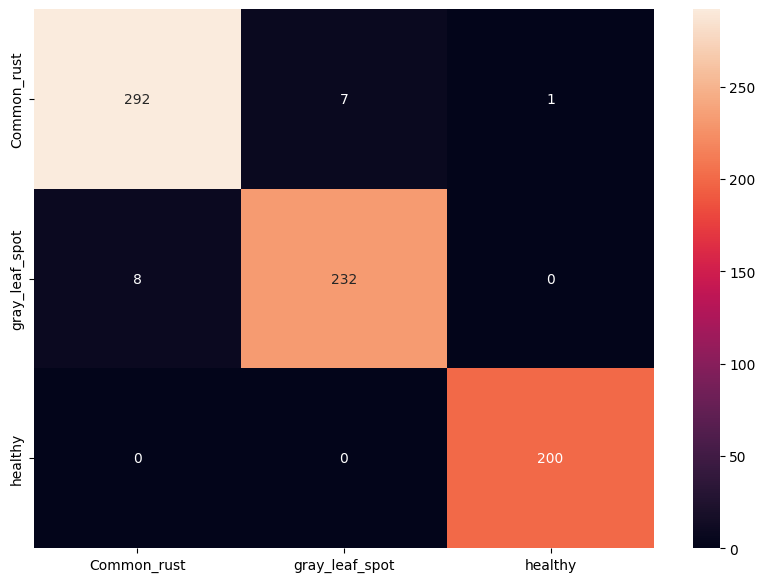

In [39]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['Common_rust', 'gray_leaf_spot', 'healthy']],
                  columns = [i for i in ['Common_rust', 'gray_leaf_spot', 'healthy']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

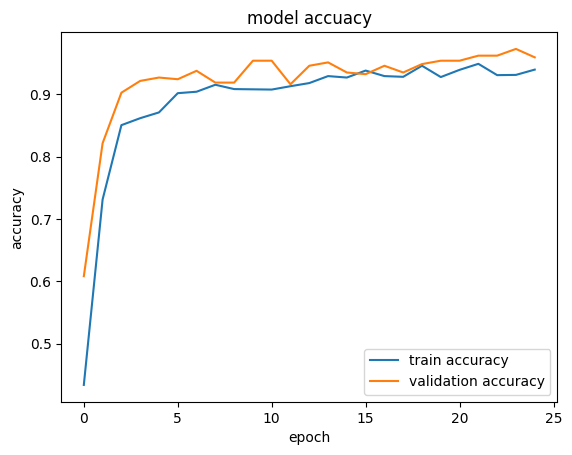

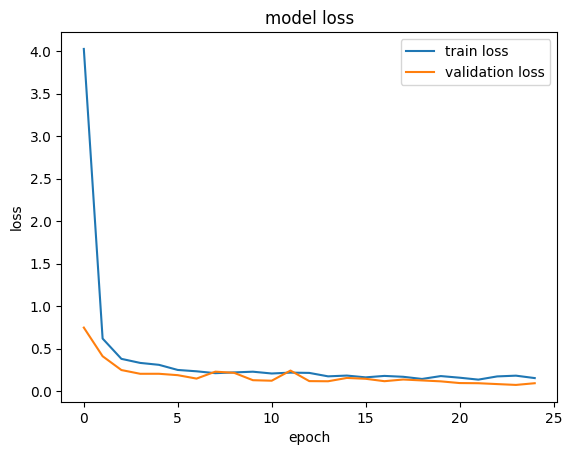

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

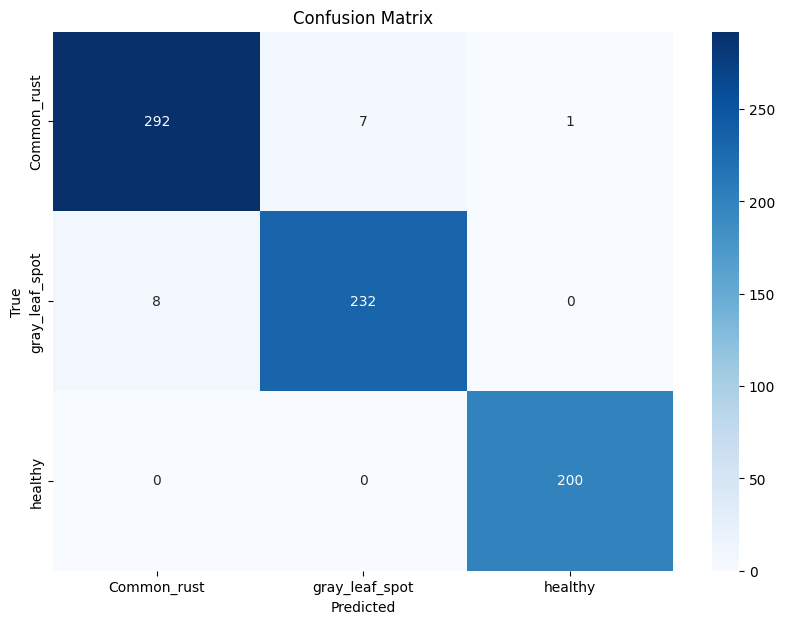

In [48]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming you have true_classes and predicted_classes
# Replace them with your actual values


cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index=['Common_rust', 'gray_leaf_spot', 'healthy'],
                     columns=['Common_rust', 'gray_leaf_spot', 'healthy'])

plt.figure(figsize=(10, 7))
# Change the color map to 'Blues'
sn.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
